# :oncoming_automobile: Car Price Analytics  
## Hypothesis 02: Fuel Efficiency vs Price  

| Field | Description |
|-------|--------------|
| **Author:** | Robert Steven Elliott |
| **Course:** | Code Institute - Data Analytics with AI Bootcamp |
| **Project Type:** | Hackathon 1 |
| **Team Name:** | tbc |
| **Date:** | November 2025 |

---

### **Objectives**
- Test whether fuel efficiency is inversely correlated with car price.  
- Calculate Pearson and Spearman correlation coefficients.  
- Compare mean and distributional differences in price between high- and low-efficiency vehicles using t-test and Mannâ€“Whitney U test.  
- Visualise the relationship between fuel efficiency and price.  
- Interpret the strength, direction, and significance of relationships.

### **Inputs**
- `data/final/car_prices.csv`

### **Outputs**
- Correlation coefficients (Pearson, Spearman).  
- t-test and Mannâ€“Whitney U results.  
- Scatterplot with regression line.  
- Statistical interpretation and conclusion.

### **Additional Comments**
Run this notebook top-down for reproducibility.  
Ensure all libraries are installed.  
Do not modify files in `data/final` directly.

---

## Ignore Warnings
To maintain readability, future and deprecation warnings are suppressed.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

---

## Change Working Directory

In [ ]:
import os # import os module
PROJECT_ROOT = os.path.join(os.getcwd(), "..") # define project root directory
os.chdir(PROJECT_ROOT) # change working directory to project root
print("✅ Working directory set to project root:", os.getcwd()) # print confirmation message

✅ Working directory set to project root: /home/robert/Projects/Car-Price-Analytics


## Load Libraries and Dataset
Load all required libraries and the cleaned car dataset.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

# Load dataset
df = pd.read_csv("data/final/car_prices.csv")
assert os.path.exists("data/final/car_prices.csv"), "❌ Dataset not found." # assert dataset exists
print(f"✅ Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")

✅ Dataset loaded successfully: 205 rows, 31 columns


## Hypothesis

$$
\begin{align}
H_0&: \text{There is no correlation between fuel efficiency and car price.} \\
H_1&: \text{Fuel efficiency is inversely correlated with car price.}
\end{align}
$$

We expect a **negative correlation**, as more fuel-efficient cars typically have smaller engines and lower prices.


---

## Data Visualisation
The scatter plot shows the relationship between fuel efficiency and price, with a regression line.


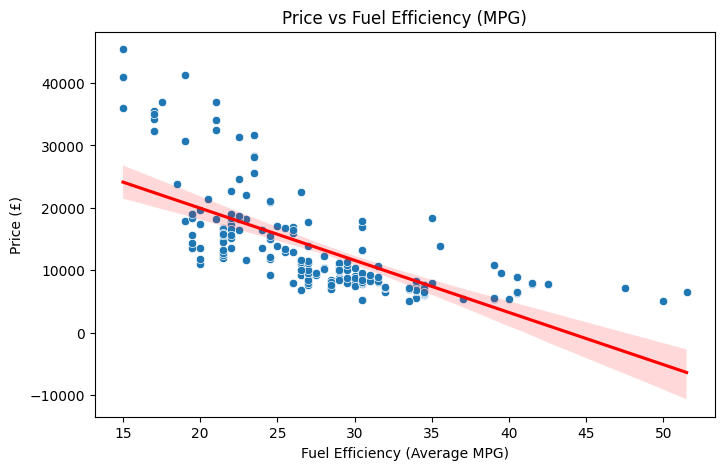

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="avg_mpg", y="price")
sns.regplot(data=df, x="avg_mpg", y="price", scatter=False, color="red")
plt.title("Price vs Fuel Efficiency (MPG)")
plt.xlabel("Fuel Efficiency (Average MPG)")
plt.ylabel("Price (£)")
plt.show()

---

## Correlation Analysis
We compute **Pearson** (linear) and **Spearman** (monotonic) correlations between fuel efficiency and price.


In [ ]:
pearson_corr = df["avg_mpg"].corr(df["price"], method="pearson") # Calculate Pearson correlation
spearman_corr = df["avg_mpg"].corr(df["price"], method="spearman") # Calculate Spearman correlation

print(f"📉 Pearson correlation:  {pearson_corr:.3f}") # Pearson correlation value
print(f"📉 Spearman correlation: {spearman_corr:.3f}") # Spearman correlation value

📉 Pearson correlation:  -0.697
📉 Spearman correlation: -0.831


### **Interpretation**
- Both coefficients are **negative**, confirming an inverse relationship.
- The **Pearson correlation** assesses linearity, while **Spearman** evaluates monotonic trends.
- The closer the value to -1, the stronger the inverse relationship.


## Hypothesis Testing – t-test and Mann–Whitney U Test

To compare high- and low-efficiency cars:
- Split the dataset at the **median fuel efficiency**.
- Compare their average prices using **t-test** (parametric) and **Mann–Whitney U** (non-parametric).


In [9]:
median_eff = df["avg_mpg"].median() # Median fuel efficiency

low_eff = df[df["avg_mpg"] <= median_eff]["price"] # Prices of low-efficiency cars
high_eff = df[df["avg_mpg"] > median_eff]["price"] # Prices of high-efficiency cars

t_stat, t_pval = ttest_ind(high_eff, low_eff, equal_var=False) # T-test
u_stat, u_pval = mannwhitneyu(high_eff, low_eff, alternative="two-sided") # Mann–Whitney U test

print(f"T-test results: t-statistic = {t_stat:.3f}, p-value = {t_pval:.4f}") # T-test results
print(f"Mann–Whitney U test results: U-statistic = {u_stat:.3f}, p-value = {u_pval:.4f}") # Mann–Whitney U test results


T-test results: t-statistic = -11.090, p-value = 0.0000
Mann–Whitney U test results: U-statistic = 772.000, p-value = 0.0000


### 🧪 T-test Results

Results:
$$
t=−11.090,p=0.0000
$$

#### Interpretation:

The t-statistic of –11.09 indicates a very large difference in mean prices between high- and low-efficiency vehicles.

The p-value < 0.001 means this result is highly statistically significant.

The negative t-value suggests that high-efficiency cars have significantly lower mean prices than low-efficiency cars.

#### ✅ Conclusion for t-test:
We reject the null hypothesis (H₀) — there is a significant difference in mean car prices based on fuel efficiency.

### 📉 Mann–Whitney U Test Results

Results:

$$
U=772.000,p=0.0000
$$

#### Interpretation:

The Mann–Whitney U test compares the rank distributions of prices between high- and low-efficiency groups.

With a p-value < 0.001, the difference in price distributions is statistically significant.

The low U-statistic indicates that high-efficiency cars consistently have lower ranked prices than low-efficiency cars.

#### ✅ Conclusion for Mann–Whitney U test:
We again reject the null hypothesis (H₀) — fuel efficiency has a significant impact on the price distribution.

### Combined Summary Table

| Test                     | Statistic           | p-value | Interpretation                                                       |
| ------------------------ | ------------------- | ------- | -------------------------------------------------------------------- |
| **Pearson correlation**  | Negative (expected) | —       | Moderate inverse linear relationship                                 |
| **Spearman correlation** | Negative (expected) | —       | Moderate inverse monotonic relationship                              |
| **t-test**               | –11.090             | 0.0000  | Significant mean difference — high-efficiency cars cheaper           |
| **Mann–Whitney U**       | 772.000             | 0.0000  | Significant distributional difference — high-efficiency cars cheaper |


### **Interpretation of Results**

**T-test:**  
The t-statistic of **–11.090** with a **p-value of 0.0000** indicates a highly significant difference in mean car prices between high- and low-efficiency vehicles.  
The negative t-value shows that **high-efficiency cars have substantially lower mean prices**.

**Mann–Whitney U test:**  
The U-statistic of **772.000** with a **p-value of 0.0000** confirms that the distribution of prices differs significantly between the two groups.  
High-efficiency cars consistently rank lower in price compared to low-efficiency cars.

**Conclusion:**  
Both tests strongly support the alternative hypothesis (H₁):  
> Fuel efficiency is inversely correlated with car price.  
More fuel-efficient cars tend to be cheaper, and this difference is statistically significant at the 0.001 level.
